In [18]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

In [2]:
sims = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [3]:
ce_results = {
    "Airbnb (rating)": {
        "mean_ce": [2.0640674,
          2.006621,
          2.05536,
          2.0044172,
          2.0128992,
          1.9931622,
          1.9532738,
          1.8628857,
          1.8858559]
    },
    "House Prices (price)": {
        "mean_ce": [
            2.3745747,
            2.3748262,
            2.3594422,
            2.3636453,
            2.3732433,
            2.3731017,
            2.3824937,
            2.355266,
            2.2036533
        ]
    },
    "ADA (income)": {
        "mean_ce": [2.3963795,
            2.2665439,
            2.3651247,
            2.393791,
            2.2345278,
            2.3244617,
            2.151318,
            2.1992073,
            2.194487]
    }
}


In [4]:
colors = ['purple', 'teal', 'coral']

In [68]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [5]:
#plt.style.use('seaborn-v0_8-dark-palette')


In [12]:
import plotly.express as px

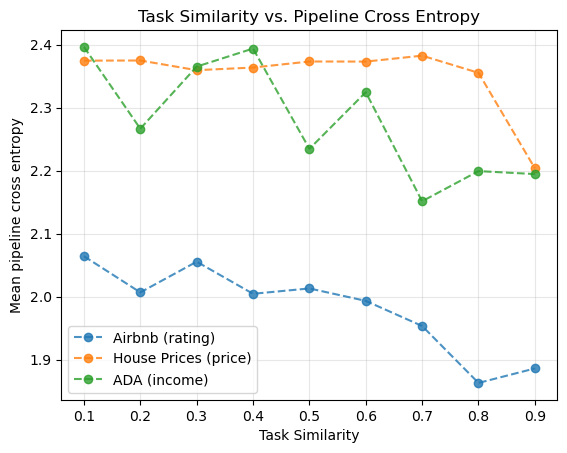

In [16]:
for dataset_name, color in zip(ce_results, colors):
    res = ce_results[dataset_name]
    mean_ce = res["mean_ce"]

    plt.plot(sims, mean_ce, marker='o', label=dataset_name, alpha=0.8, linestyle='dashed')

    plt.xlabel("Task Similarity")
    plt.ylabel("Mean pipeline cross entropy")

plt.grid(alpha=0.3)
plt.legend()
plt.title("Task Similarity vs. Pipeline Cross Entropy")

plt.savefig('plots/pipeline_ce_synth.png', dpi=300)

In [46]:
for dataset_name in ce_results:
    res = ce_results[dataset_name]
    mean_ce = res["mean_ce"]
    print(dataset_name, pearsonr(sims, mean_ce))

Airbnb (rating) PearsonRResult(statistic=-0.8937535849538031, pvalue=0.001158516201057101)
House Prices (price) PearsonRResult(statistic=-0.5601170097283068, pvalue=0.11676928458689406)
ADA (income) PearsonRResult(statistic=-0.7438753412576491, pvalue=0.0215635466450674)


In [50]:
agr_results = {
    "Airbnb (rating)": {
        "ops_agr_mean":{
            'Numerical Imputation': 0.9969969969969968,
            'Categorical Imputation': 0.9924242424242424,
            'Normalization': 0.7733333333333333,
            'Outlier Removal': 0.7742222222222223,
            'Discretization': 0.8560000000000001
        },
        "ops_agr_stddev": {
            'Numerical Imputation': 0.008493775149387942,
            'Categorical Imputation': 0.00927837023781506,
            'Normalization': 0.12410748030101436,
            'Outlier Removal': 0.06827685109216539,
            'Discretization': 0.03597530016861877
        }
    },
    "House Prices (price)": {
        "ops_agr_mean": {
            'Numerical Imputation': 1.0,
            'Categorical Imputation': 0.9453488372093025,
            'Normalization': 0.727457627118644,
            'Outlier Removal': 0.7966101694915253,
            'Discretization': 0.7772881355932203
        },
        "ops_agr_stddev":{
            'Numerical Imputation': 0.0,
            'Categorical Imputation': 0.010173957169307529,
            'Normalization': 0.0031068309796310604,
            'Outlier Removal': 1.1102230246251565e-16,
            'Discretization': 0.008310271642122892
        }
    },
    "ADA (income)": {
        "ops_agr_mean": {
            'Numerical Imputation': 1.0,
            'Categorical Imputation': 0.9869976359338062,
            'Normalization': 0.5398428731762066,
            'Outlier Removal': 0.7912457912457912,
            'Discretization': 0.718294051627385
        },
        "ops_agr_stddev": {
            'Numerical Imputation': 0.0,
            'Categorical Imputation': 0.008358236184238168,
            'Normalization': 0.06685195336401988,
            'Outlier Removal': 0.043641351504430013,
            'Discretization': 0.04349679545471627
        }
    }
}


In [56]:
# fig, ax = plt.subplots()


# for dataset_name, color in zip(ce_results, colors):

#     if dataset_name == 'House Prices (price)':
#         continue

#     agr_res = agr_results[dataset_name]
#     ops_agr_mean = agr_res['ops_agr_mean']
#     ops_agr_stddev = agr_res['ops_agr_stddev']


#     ax.plot(ops_agr_mean.keys(), list(ops_agr_mean.values()), color=color, label='mean', marker='o', linestyle='dashed')
#     plt.errorbar(ops_agr_mean.keys(), list(ops_agr_mean.values()), list(ops_agr_stddev.values()), fmt='o', capsize=5, elinewidth=2, color='#7EA1FF', label='1 std')

#     ax.set_xlabel("Transformation Types")
#     ax.set_ylabel("% agreement in pipeline operations")

#     ax.grid(alpha=0.3)

# plt.xticks(rotation=45)
# plt.legend()

# #plt.title("House Prices (price)")

In [19]:
sims = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

dists = [277.8707275390625,
 122.52706909179688,
 119.52642822265625,
 159.44290161132812,
 159.17547607421875,
 70.31987762451172,
 122.73501586914062,
 45.81694030761719,
 154.3663330078125,
 38.74238967895508]

corr = -0.66

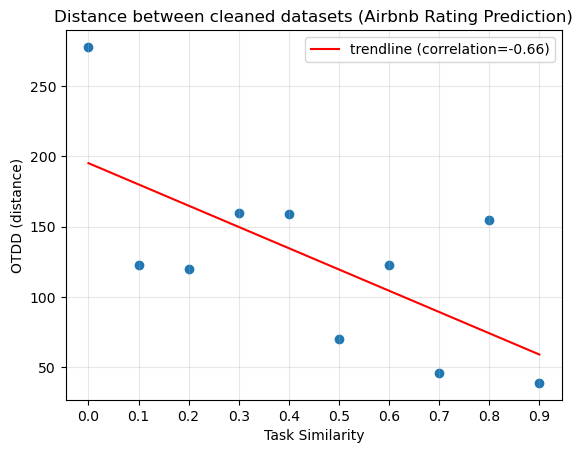

In [22]:
plt.scatter(sims, dists, marker='o')

z = np.polyfit(sims, dists, 1)
p = np.poly1d(z)

plt.plot(sims, p(sims), color='red', label=f'trendline (correlation={corr})')

plt.xticks(np.arange(0, 1, 0.1))

plt.xlabel("Task Similarity")
plt.ylabel("OTDD (distance)")

plt.grid(alpha=0.3)
plt.legend()
plt.title("Distance between cleaned datasets (Airbnb Rating Prediction)")

plt.savefig('./plots/airbnb_dataset_distance.png', dpi=200)